In [1]:
%pylab inline

from ch_shrinkwrap import sdf
from PYME.simulation.locify import points_from_sdf
from ch_shrinkwrap.evaluation_utils import construct_ordered_pairs, mean_and_hausdorff_distance_from_ordered_pairs, mean_and_hausdorff_smoothness_from_ordered_pairs

Populating the interactive namespace from numpy and matplotlib


(-1.0999746846305767,
 1.0999880061730654,
 -1.0999170163068994,
 1.1000456744967426)

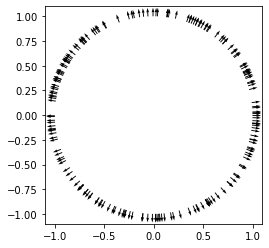

In [55]:
R0 = 1
R1 = 0.8
n_points=200
# dx_min = 0.1
# p = 0.1
# sphere_sdf0 = lambda p: sdf.sphere(p,R0)
# sphere_sdf1 = lambda p: sdf.sphere(p,R1)

# pts0 = points_from_sdf(sphere_sdf0, r_max=1.2*R0, centre=(0,0,0), dx_min=dx_min, p=p)
# n0 = sdf.sdf_normals(pts0, sphere_sdf0)

# pts1 = points_from_sdf(sphere_sdf1, r_max=1.2*R1, centre=(0,0,0), dx_min=dx_min, p=p)
# n1 = sdf.sdf_normals(pts1, sphere_sdf1)

# print(pts0)

# idx0 = (np.abs(pts0[2,:]) < dx_min) & (pts0[2,:] > 0)
# idx1 = (np.abs(pts1[2,:]) < dx_min) & (pts1[2,:] > 0)
# pts0 = pts0[:,idx0]
# pts1 = pts1[:,idx1]
# n0 = n0[:,idx0]
# n1 = n1[:,idx1]

pts0 = np.random.randn(2,n_points)
pts0 /= np.linalg.norm(pts0,axis=0)[None,:]
pts0 *= R0
pts0 = np.vstack([pts0,np.zeros(n_points)])
n0 = pts0/R0

pts1 = np.random.randn(2,n_points)
pts1 /= np.linalg.norm(pts1,axis=0)[None,:]
pts1 *= R1
pts1 = np.vstack([pts1,np.zeros(n_points)])
# pts1 = pts0 + 10*n0 + np.array([1,0,0])[:,None]
n1 = pts1/R1

# plt.scatter(pts0[0,:], pts0[1,:])

plt.quiver(pts0[0,:],pts0[1,:], n0[0,:], n0[1,:])
axis('square')

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

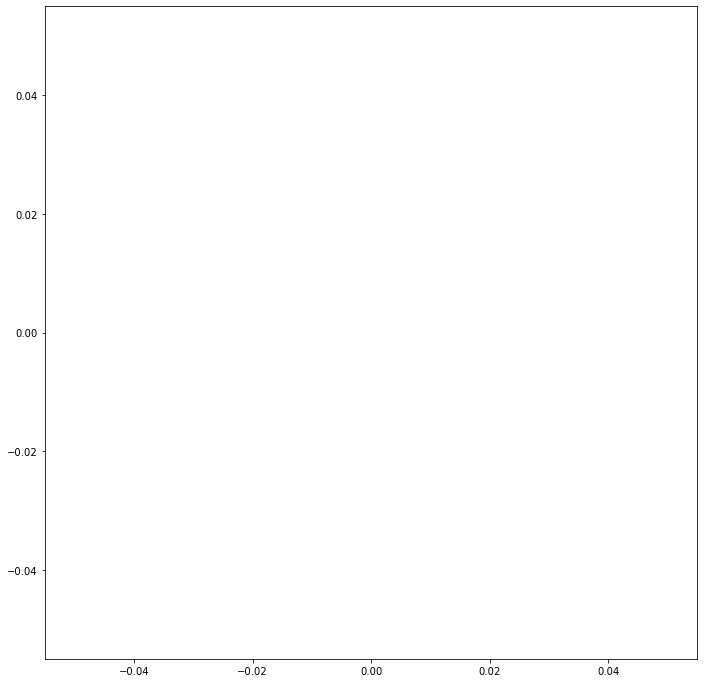

In [56]:
ox, oa, mx, ma = construct_ordered_pairs(pts0.T, pts1.T, n0.T, n1.T, dx_max=1e-8)

plt.figure(figsize=(12,12))
ix, ia = ox, ma
m = cm.gist_rainbow(np.arange(len(ix))/(len(ix)))
plt.quiver(pts0[0,ia], pts0[1,ia], n0[0,ia], n0[1,ia])
plt.scatter(pts1[0,ix], pts1[1,ix], c=m)
plt.scatter(pts0[0,ia], pts0[1,ia], c=m)
# plt.xlim([-2,2])
# plt.ylim([-2,2])
axis('square')

In [57]:
hd, md = mean_and_hausdorff_distance_from_ordered_pairs(pts0.T, pts1.T, ox, oa, mx, ma)
ha, aa = mean_and_hausdorff_smoothness_from_ordered_pairs(n0.T, n1.T, ox, oa, mx, ma)

print(f"Hausdorff distance: {hd:.3f} Mean distance: {md:.3f} Max angle: {ha:.3f} rad Mean angle: {aa:.3f} rad")

ValueError: zero-size array to reduction operation maximum which has no identity